<a href="https://colab.research.google.com/github/kra2839/2025-1-myclass-BDA/blob/main/inclass/10w_A_mon_0519_easy_ch08_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10주 : 단원 08-3 그래프 만들기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.5 MB/s eta 0:00:00


In [ ]:
%config inlineBackend.figure_format = 'retina'

In [ ]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [ ]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [ ]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [ ]:
pd.set_option('display.precision', 2)

In [ ]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy=('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.17
1,f,28.16
2,r,21.00


<Axes: xlabel='drv', ylabel='mean_hwy'>

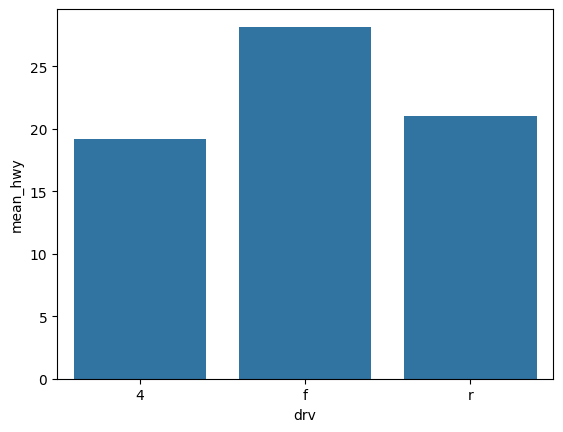

In [ ]:
sns.barplot(df_mpg, x = 'drv', y='mean_hwy')

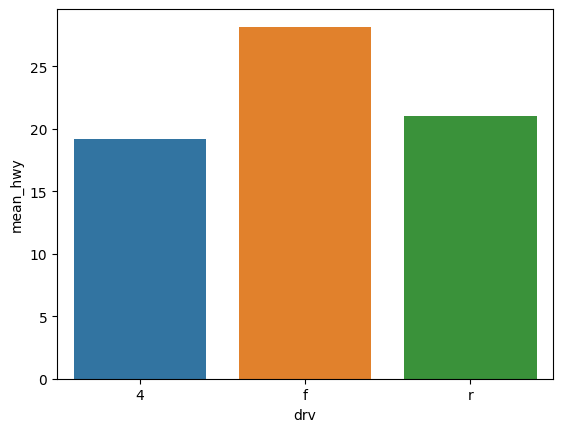

In [ ]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv');

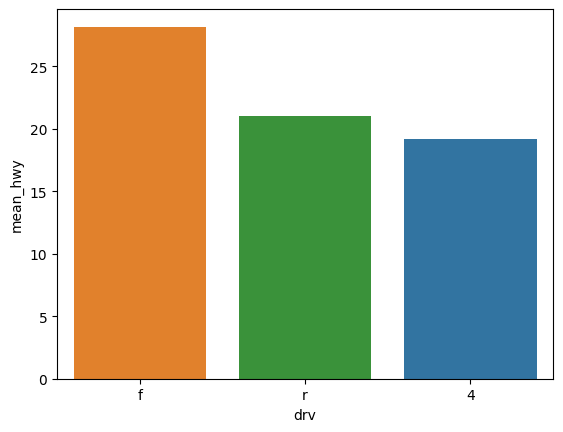

In [ ]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv', order=['f', 'r', '4']);

In [ ]:
sns.barplot(data=df_mpg, x='drv', y='hwy', hue='fl');

ValueError: Could not interpret value `hwy` for `y`. An entry with this name does not appear in `data`.

In [ ]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [ ]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns={'model':'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [ ]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [ ]:
df_mpg2 = mpg.groupby('drv').agg(n= ('drv', 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


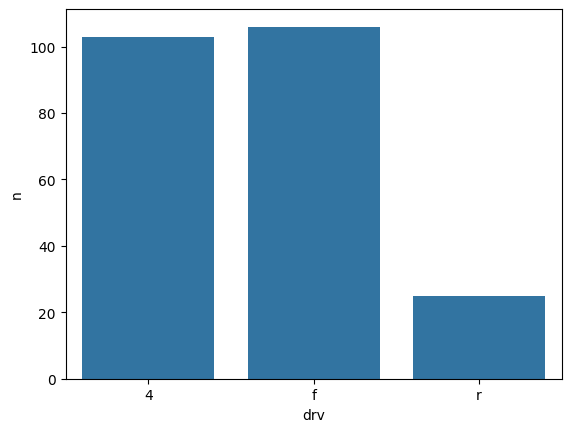

In [ ]:
sns.barplot(df_mpg, x='drv', y='n');

<Axes: xlabel='drv', ylabel='n'>

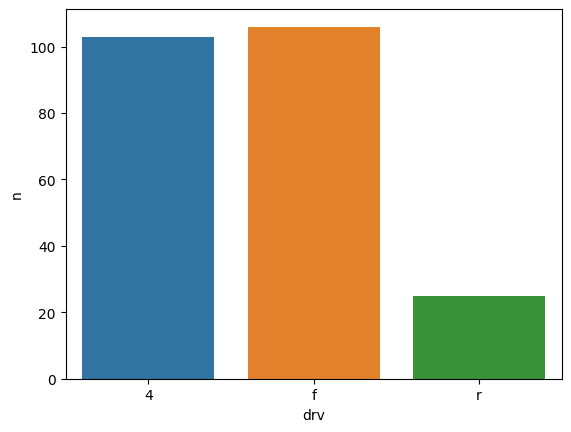

In [ ]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv')

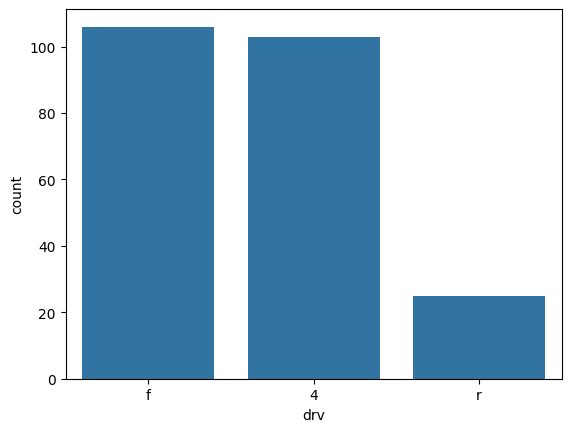

In [ ]:
sns.countplot(mpg, x='drv');

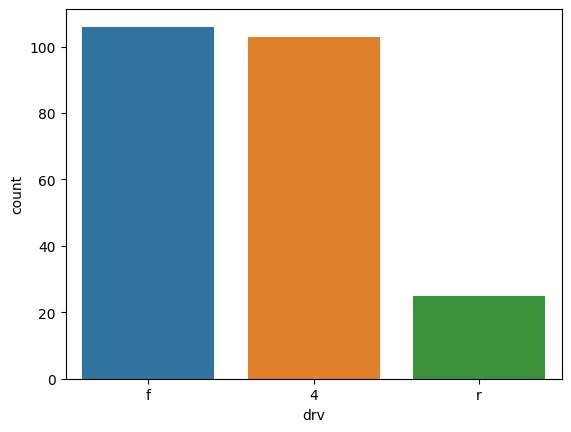

In [ ]:
sns.countplot(mpg, x='drv', hue='drv');

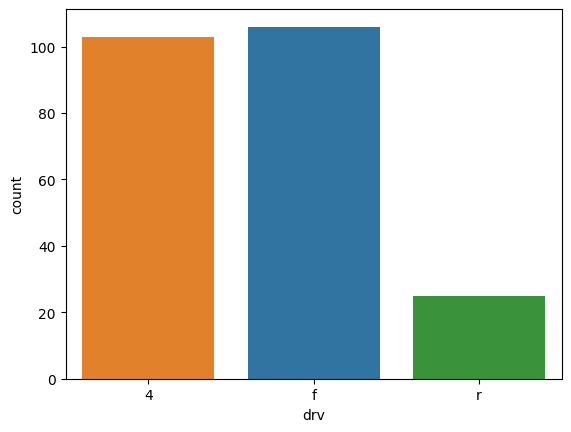

In [ ]:
sns.countplot(mpg, x='drv', hue='drv', order=['4', 'f', 'r']);

In [ ]:
sns.countplot(mpg2, x='drv', y='n', hue='drv');

NameError: name 'mpg2' is not defined

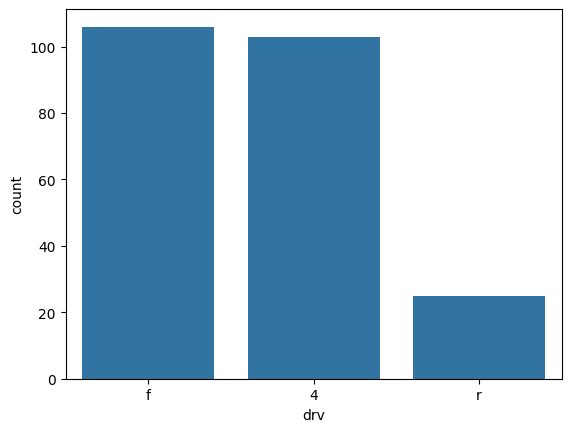

In [ ]:
sns.countplot(data=mpg, x='drv');

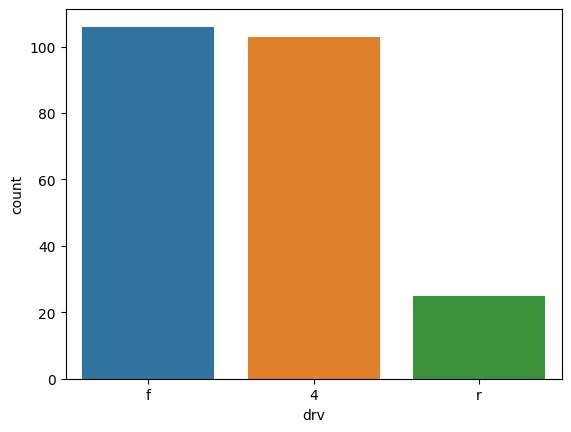

In [ ]:
sns.countplot(data=mpg, x='drv', hue='drv');

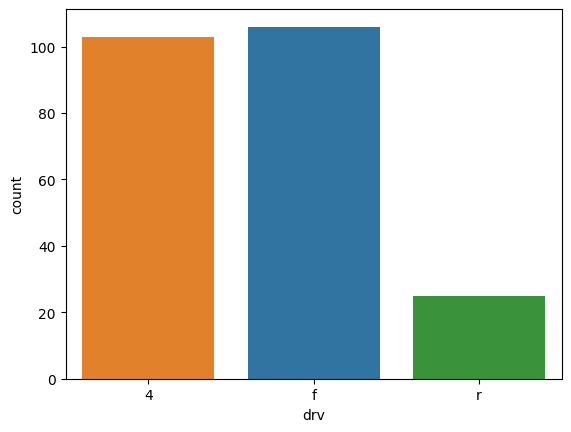

In [ ]:
sns.countplot(data=mpg, x='drv', hue='drv', order=['4', 'f', 'r']);

In [ ]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

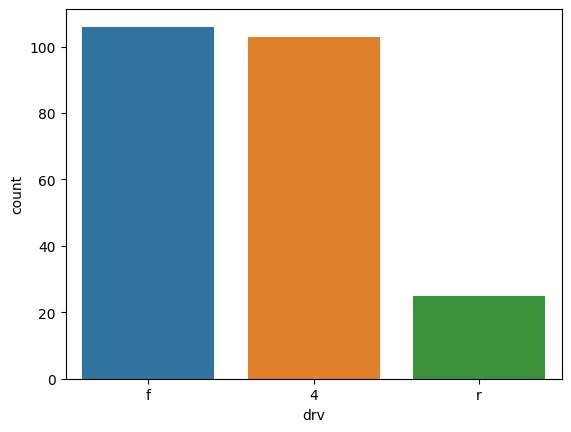

In [ ]:
sns.countplot(data=mpg, x='drv', hue='drv', order=mpg.drv.value_counts().index);

In [ ]:
!rm -r data

In [ ]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 36 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 2.19 MiB | 3.86 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
eco = pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [ ]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [ ]:
eco.shape

(574, 6)

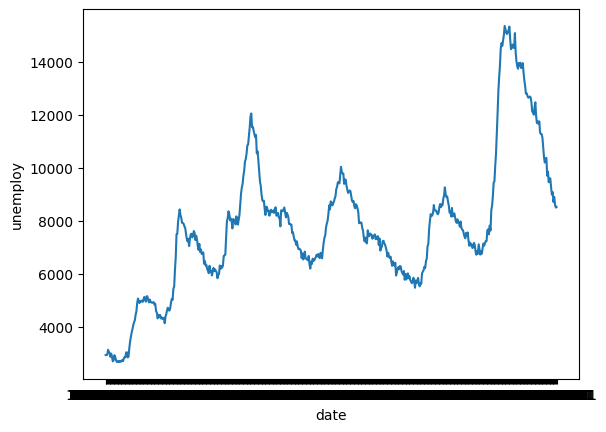

In [ ]:
sns.lineplot(data=eco, x='date', y='unemploy');

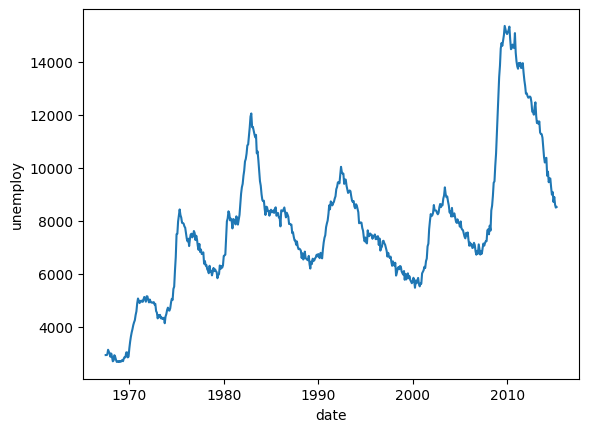

In [ ]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='unemploy');

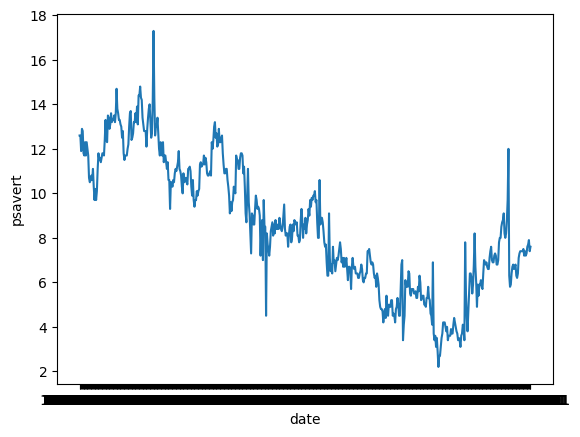

In [ ]:
sns.lineplot(data=eco, x='date', y='psavert');

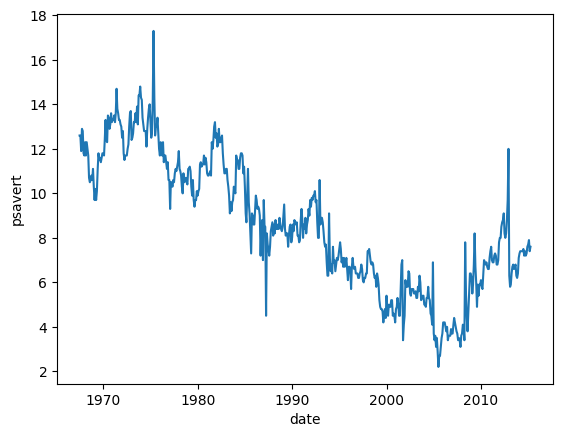

In [ ]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='psavert');

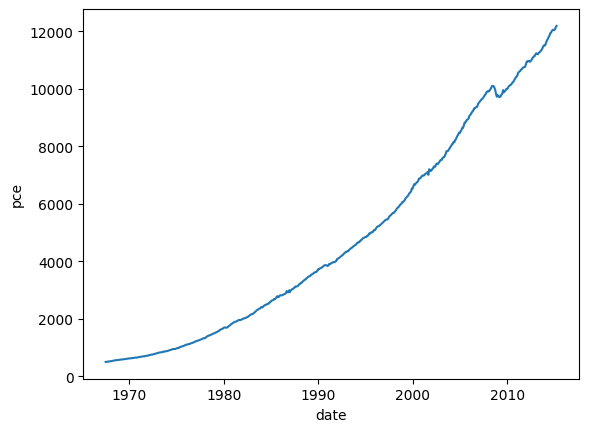

In [ ]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='pce');

In [ ]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [ ]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
eco[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [ ]:
eco[['date', 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [ ]:
eco.date2.dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [ ]:
eco['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [ ]:
eco['date2'].dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [ ]:
eco['date2'].dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [ ]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco['day'] = eco['date2'].dt.day

In [ ]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


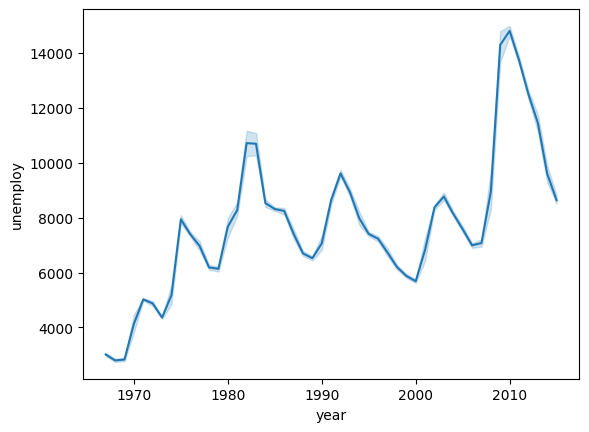

In [ ]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy');

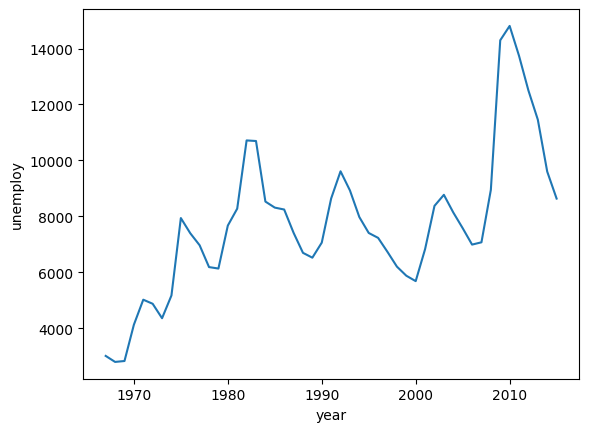

In [ ]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy', errorbar=None);


### 박스상자의 구성요소
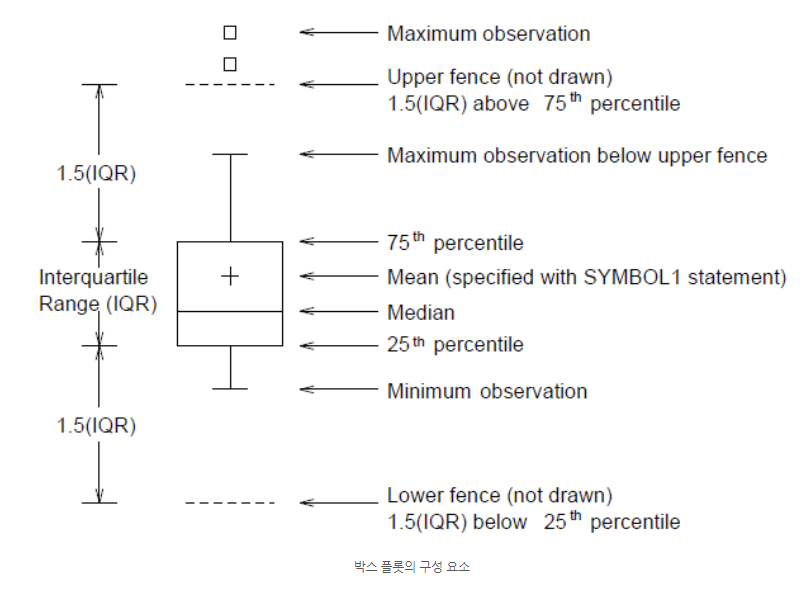

<Axes: xlabel='drv', ylabel='hwy'>

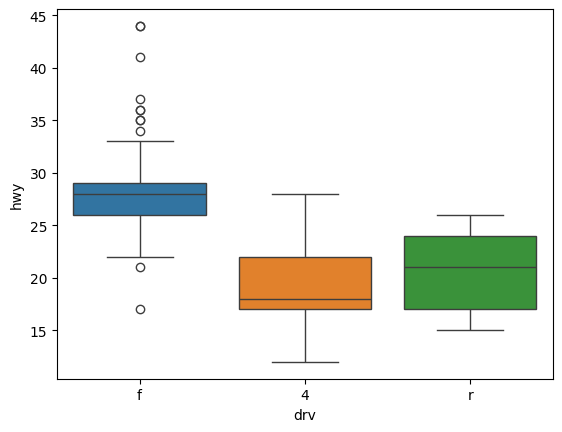

In [ ]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')

In [ ]:
plt.rcParams.update({'figure.figsize': [7, 3]})

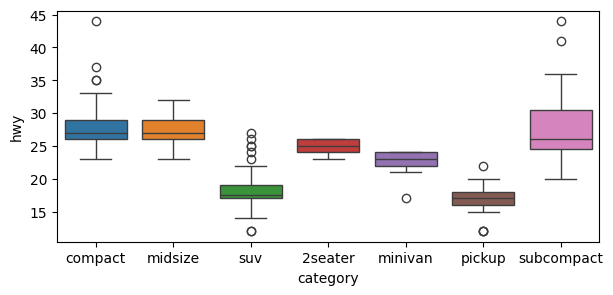

In [ ]:
sns.boxplot(mpg, x='category', y='hwy', hue='category');

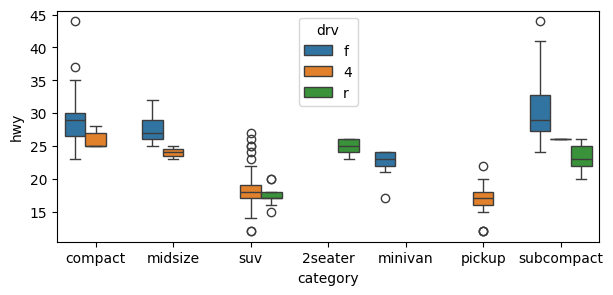

In [ ]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

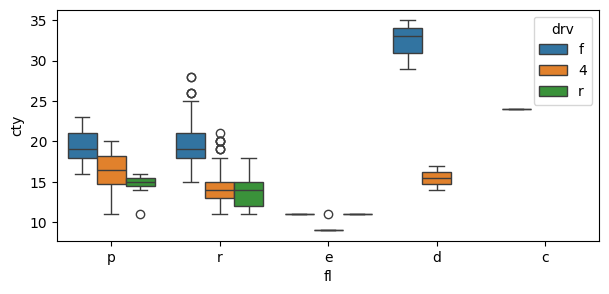

In [ ]:
sns.boxplot(mpg, x='fl', y='cty', hue='drv');

In [ ]:
mpg.query('fl == "e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [ ]:
mpg[ mpg.fl == "e" ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


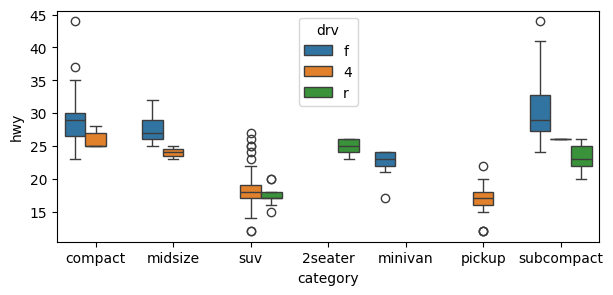

In [ ]:
sns.boxplot(mpg, x='category', y='hwy', hue='drv');

### 정리하기

| seaborn 함수      | 그래프                    |
|-------------------|---------------------------|
| sns.scatterplot() | 산점도                    |
| sns.barplot()     | 막대 그래프 - 요약표 활용 |
| sns.countplot()   | 막대 그래프 - 원자료 활용 |
| sns.lineplot()    | 선 그래프                 |
| sns.boxplot()     | 상자 그림                 |

In [ ]:
plt.rcParams.update({'figure.figsize': [5, 3]})

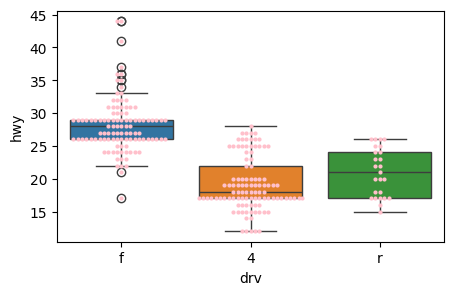

In [ ]:
sns.boxplot(mpg, x='drv', y = 'hwy', hue='drv');
sns.swarmplot(mpg, x='drv', y = 'hwy', color='pink', size=3);

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [ ]:
import pandas as pd

# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 6, 7],
                      'final' : [70, 83, 65, 95, 80]})

In [ ]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [ ]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,6,95
4,7,80


In [ ]:
display_side_by_side(test1, test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [ ]:
display_side_by_side(test1, test2, test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95
